# Importing of packages:

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score


# Checking the data:

In [65]:
billData = pd.read_csv('fake_bills.csv', delimiter = ';')
print(billData.describe())
print(billData.head())

          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52     

# Plotting data distrobutions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


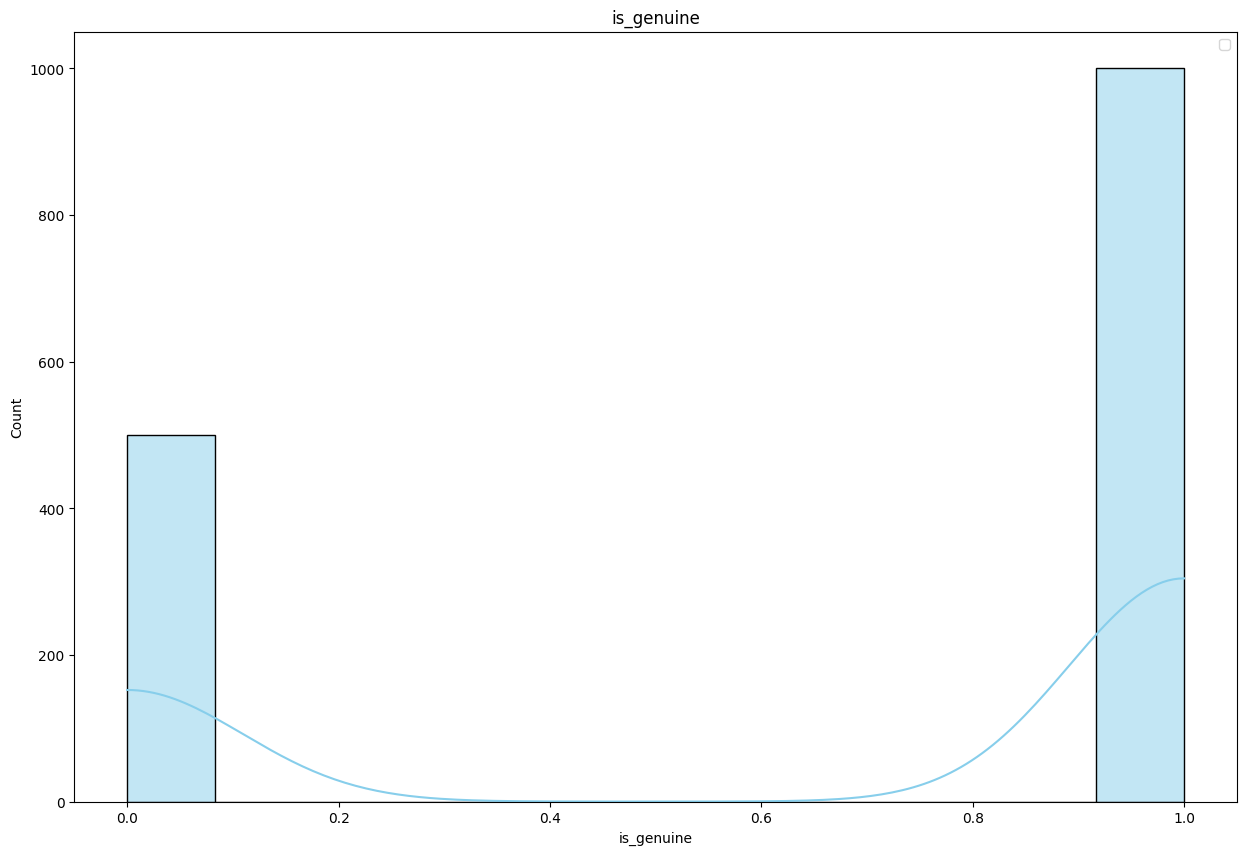

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


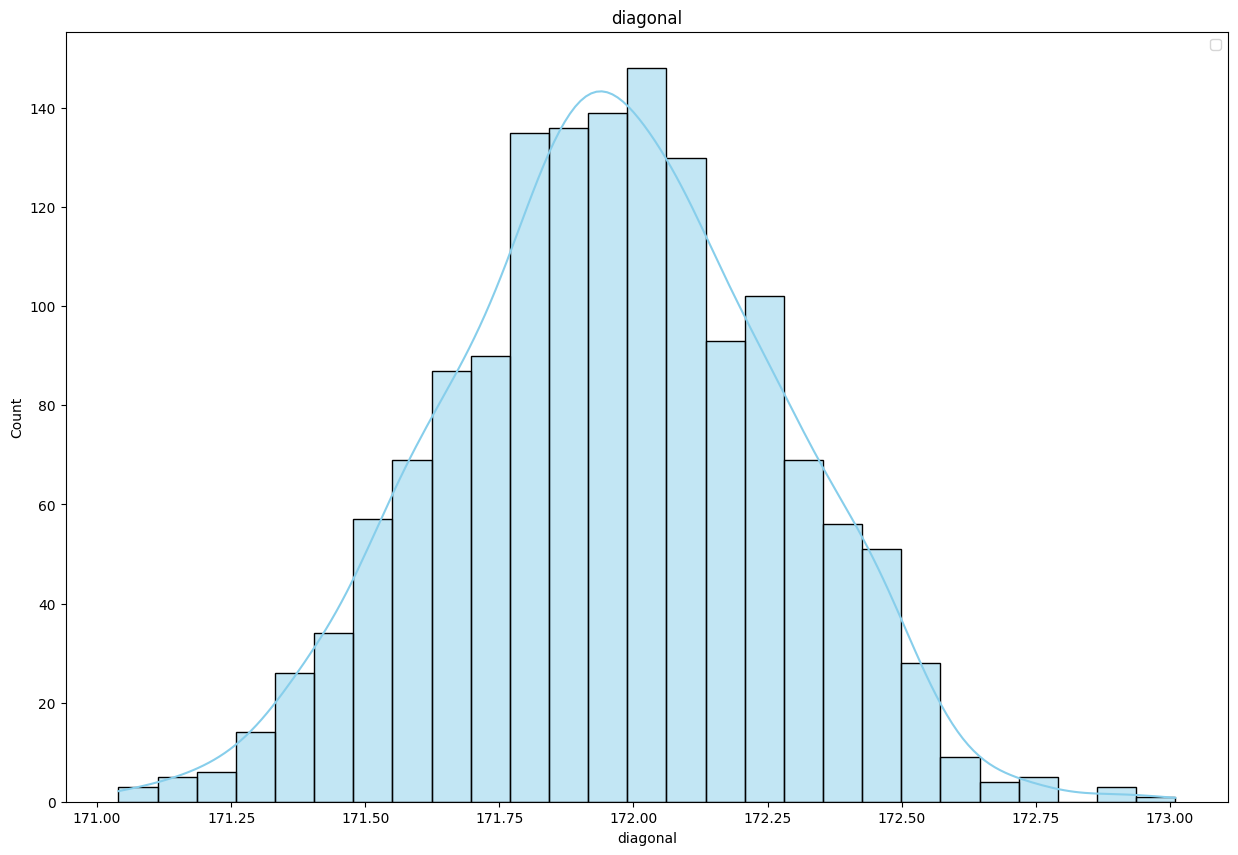

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


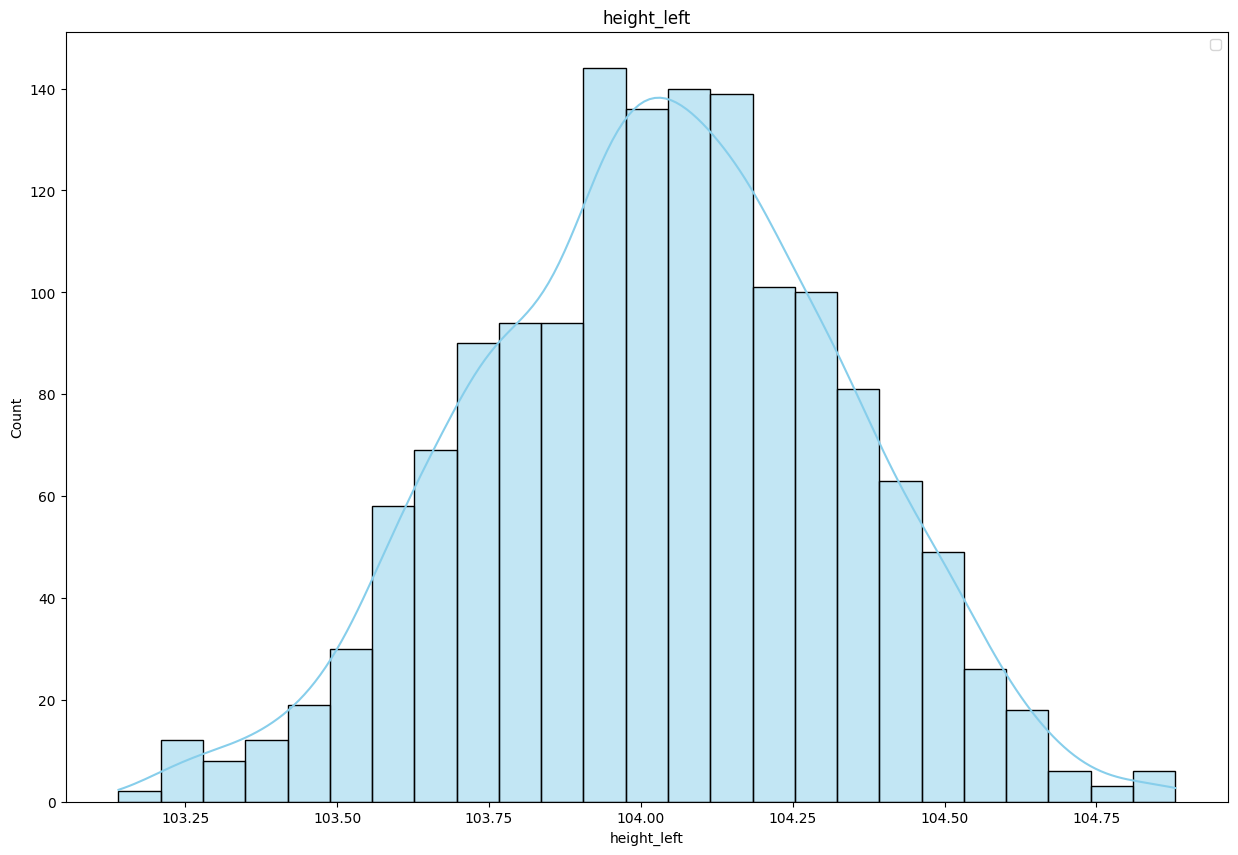

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


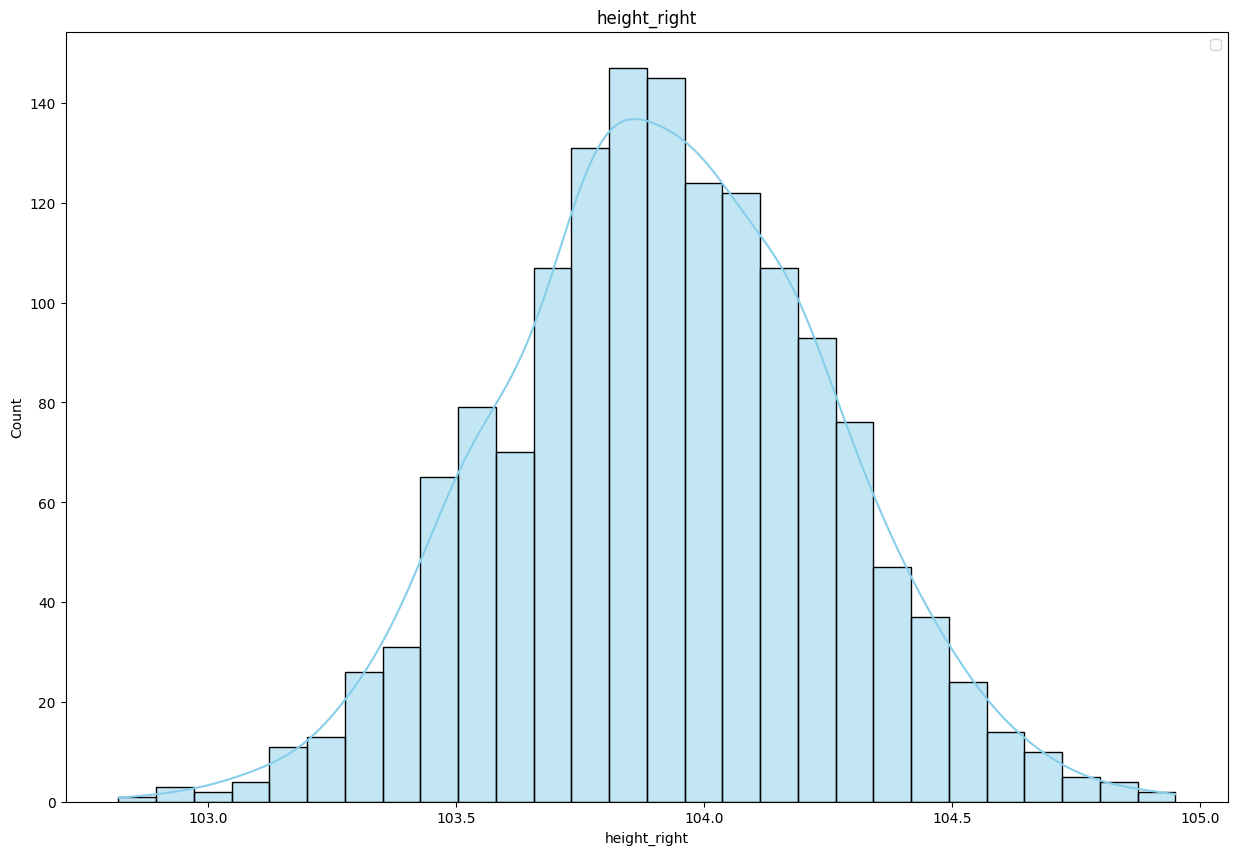

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


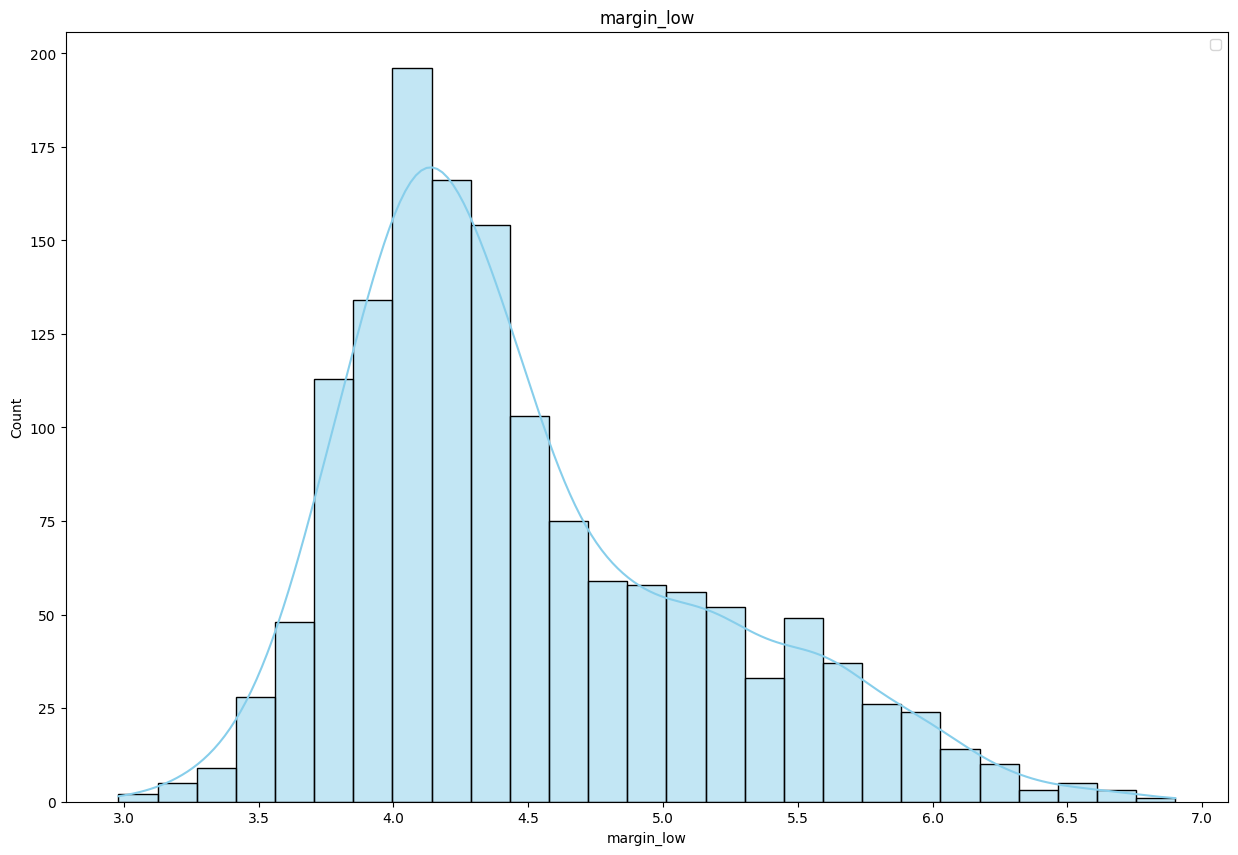

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


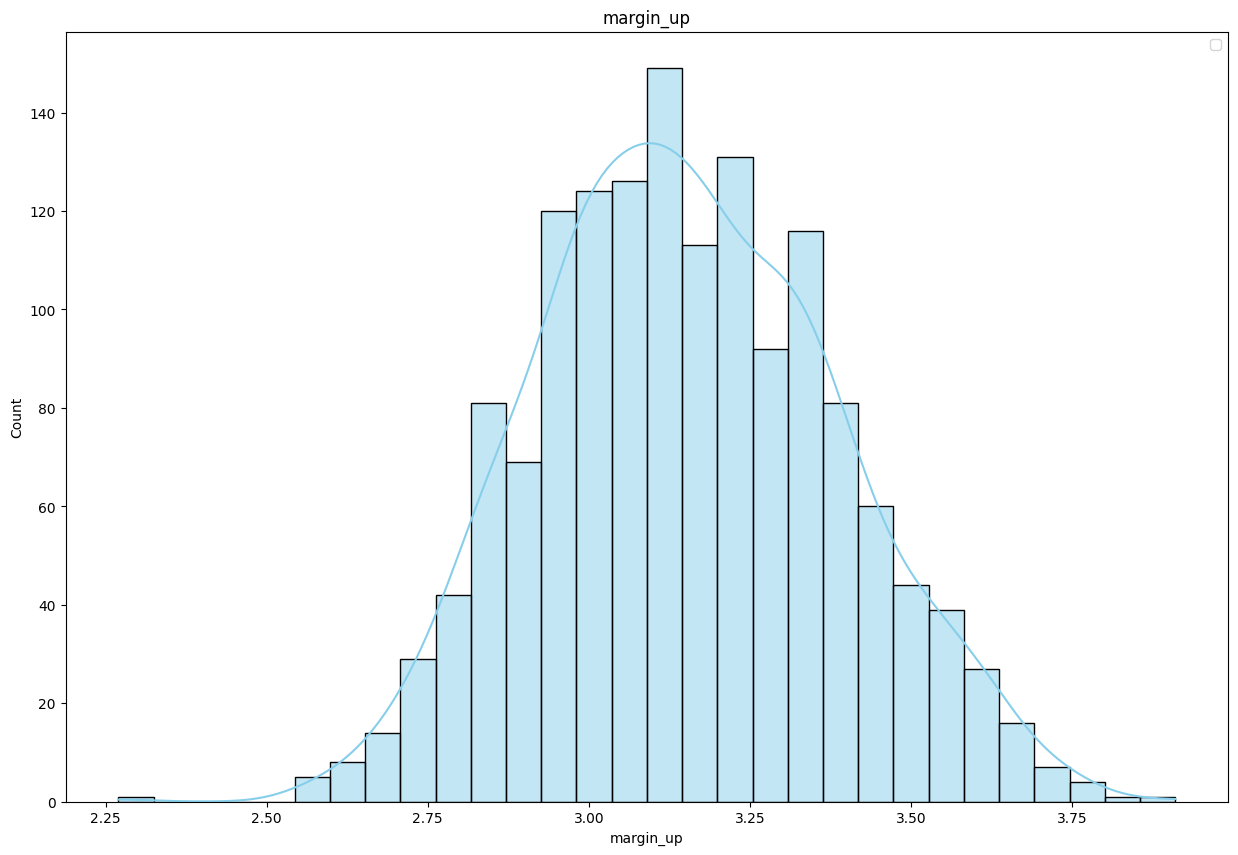

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


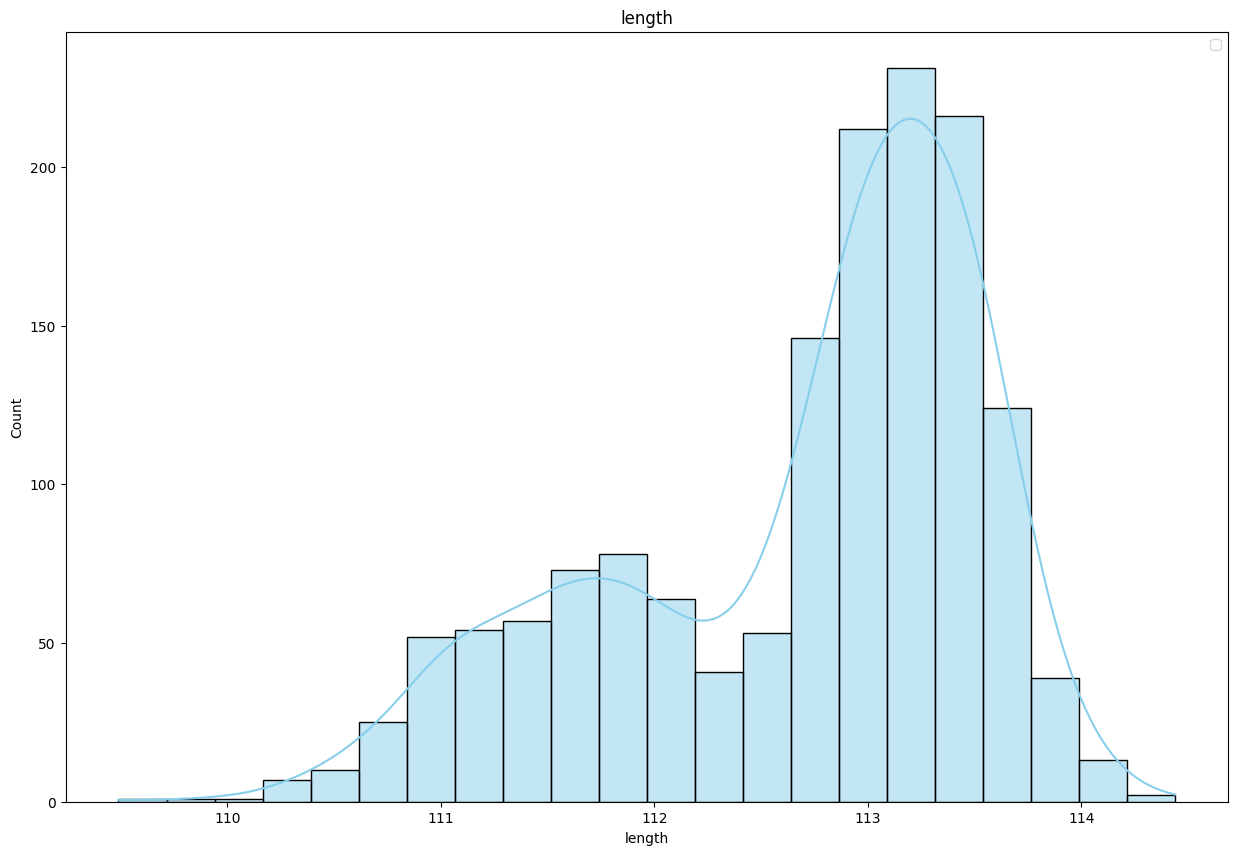

<Figure size 640x480 with 0 Axes>

In [66]:
for cols in billData:

    plt.figure(figsize=(15,10))

    sns.histplot(billData[cols],kde=True,color='skyblue')

    plt.xlabel(cols)

    plt.title(cols)

    plt.legend()

    plt.show()

plt.tight_layout()



# Starting Sklearn model work and clean the data some

In [67]:
# Data cleaning and initializing x and y
billData.dropna(inplace=True)
xData = billData[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
yData = billData['is_genuine']

In [68]:
# Data training and filling missing values with imputer
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 40)
billImpute = SimpleImputer(strategy = 'mean')
billImpute.fit(xTrain)
# transform train data with imputer
xTrainImputed = billImpute.transform(xTrain)
# transform test data with imputer
xTestImputed = billImpute.transform(xTest)

# Build KNN model

In [69]:
# Create and train the KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 99.32%
[[101   1]
 [  1 190]]


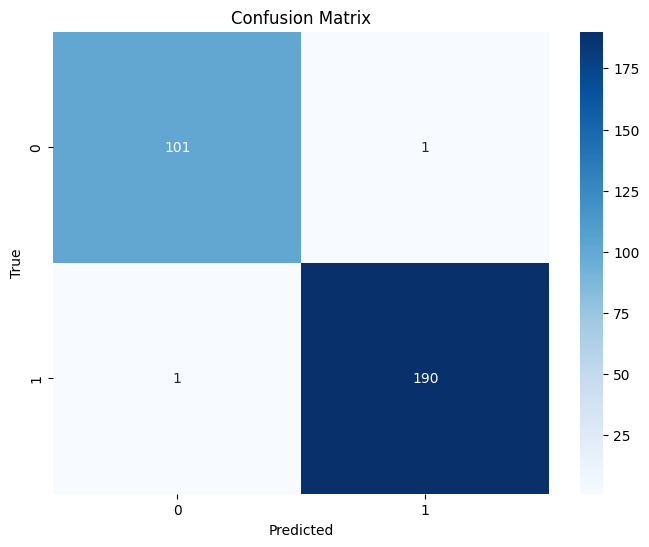

In [70]:
# Make Predictions and test the model
yPredict = knn.predict(xTestImputed)

accuracy = accuracy_score(yTest, yPredict)
print(f"Accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(yTest, yPredict)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


